/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_4426/554908065.py:13: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(file_path2)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


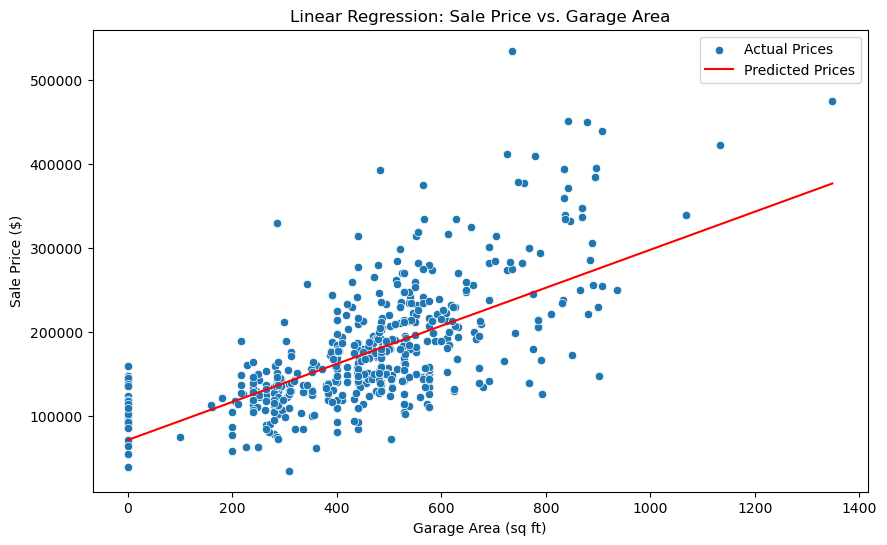

(2807530422.5842924, 0.4564265611210928)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the datasets
file_path1 = 'Ames_HousePrice.csv'
file_path2 = 'Ames Real Estate Data.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

data1.head(), data2.head()
# Filter out rows with missing values in the relevant columns
data = data1[['SalePrice', 'GarageArea']].dropna()

# Define the predictor and target variables
X = data[['GarageArea']]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['GarageArea'], y=y_test, label='Actual Prices')
sns.lineplot(x=X_test['GarageArea'], y=y_pred, color='red', label='Predicted Prices')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Linear Regression: Sale Price vs. Garage Area')
plt.legend()
plt.show()

(mse, r2)

In [12]:
# Selecting relevant columns for correlation analysis
relevant_columns = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
subset_data = data1[relevant_columns]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

correlation_matrix['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.790501
GrLivArea      0.719981
TotalBsmtSF    0.652222
GarageCars     0.638801
GarageArea     0.634992
YearBuilt      0.544370
Name: SalePrice, dtype: float64

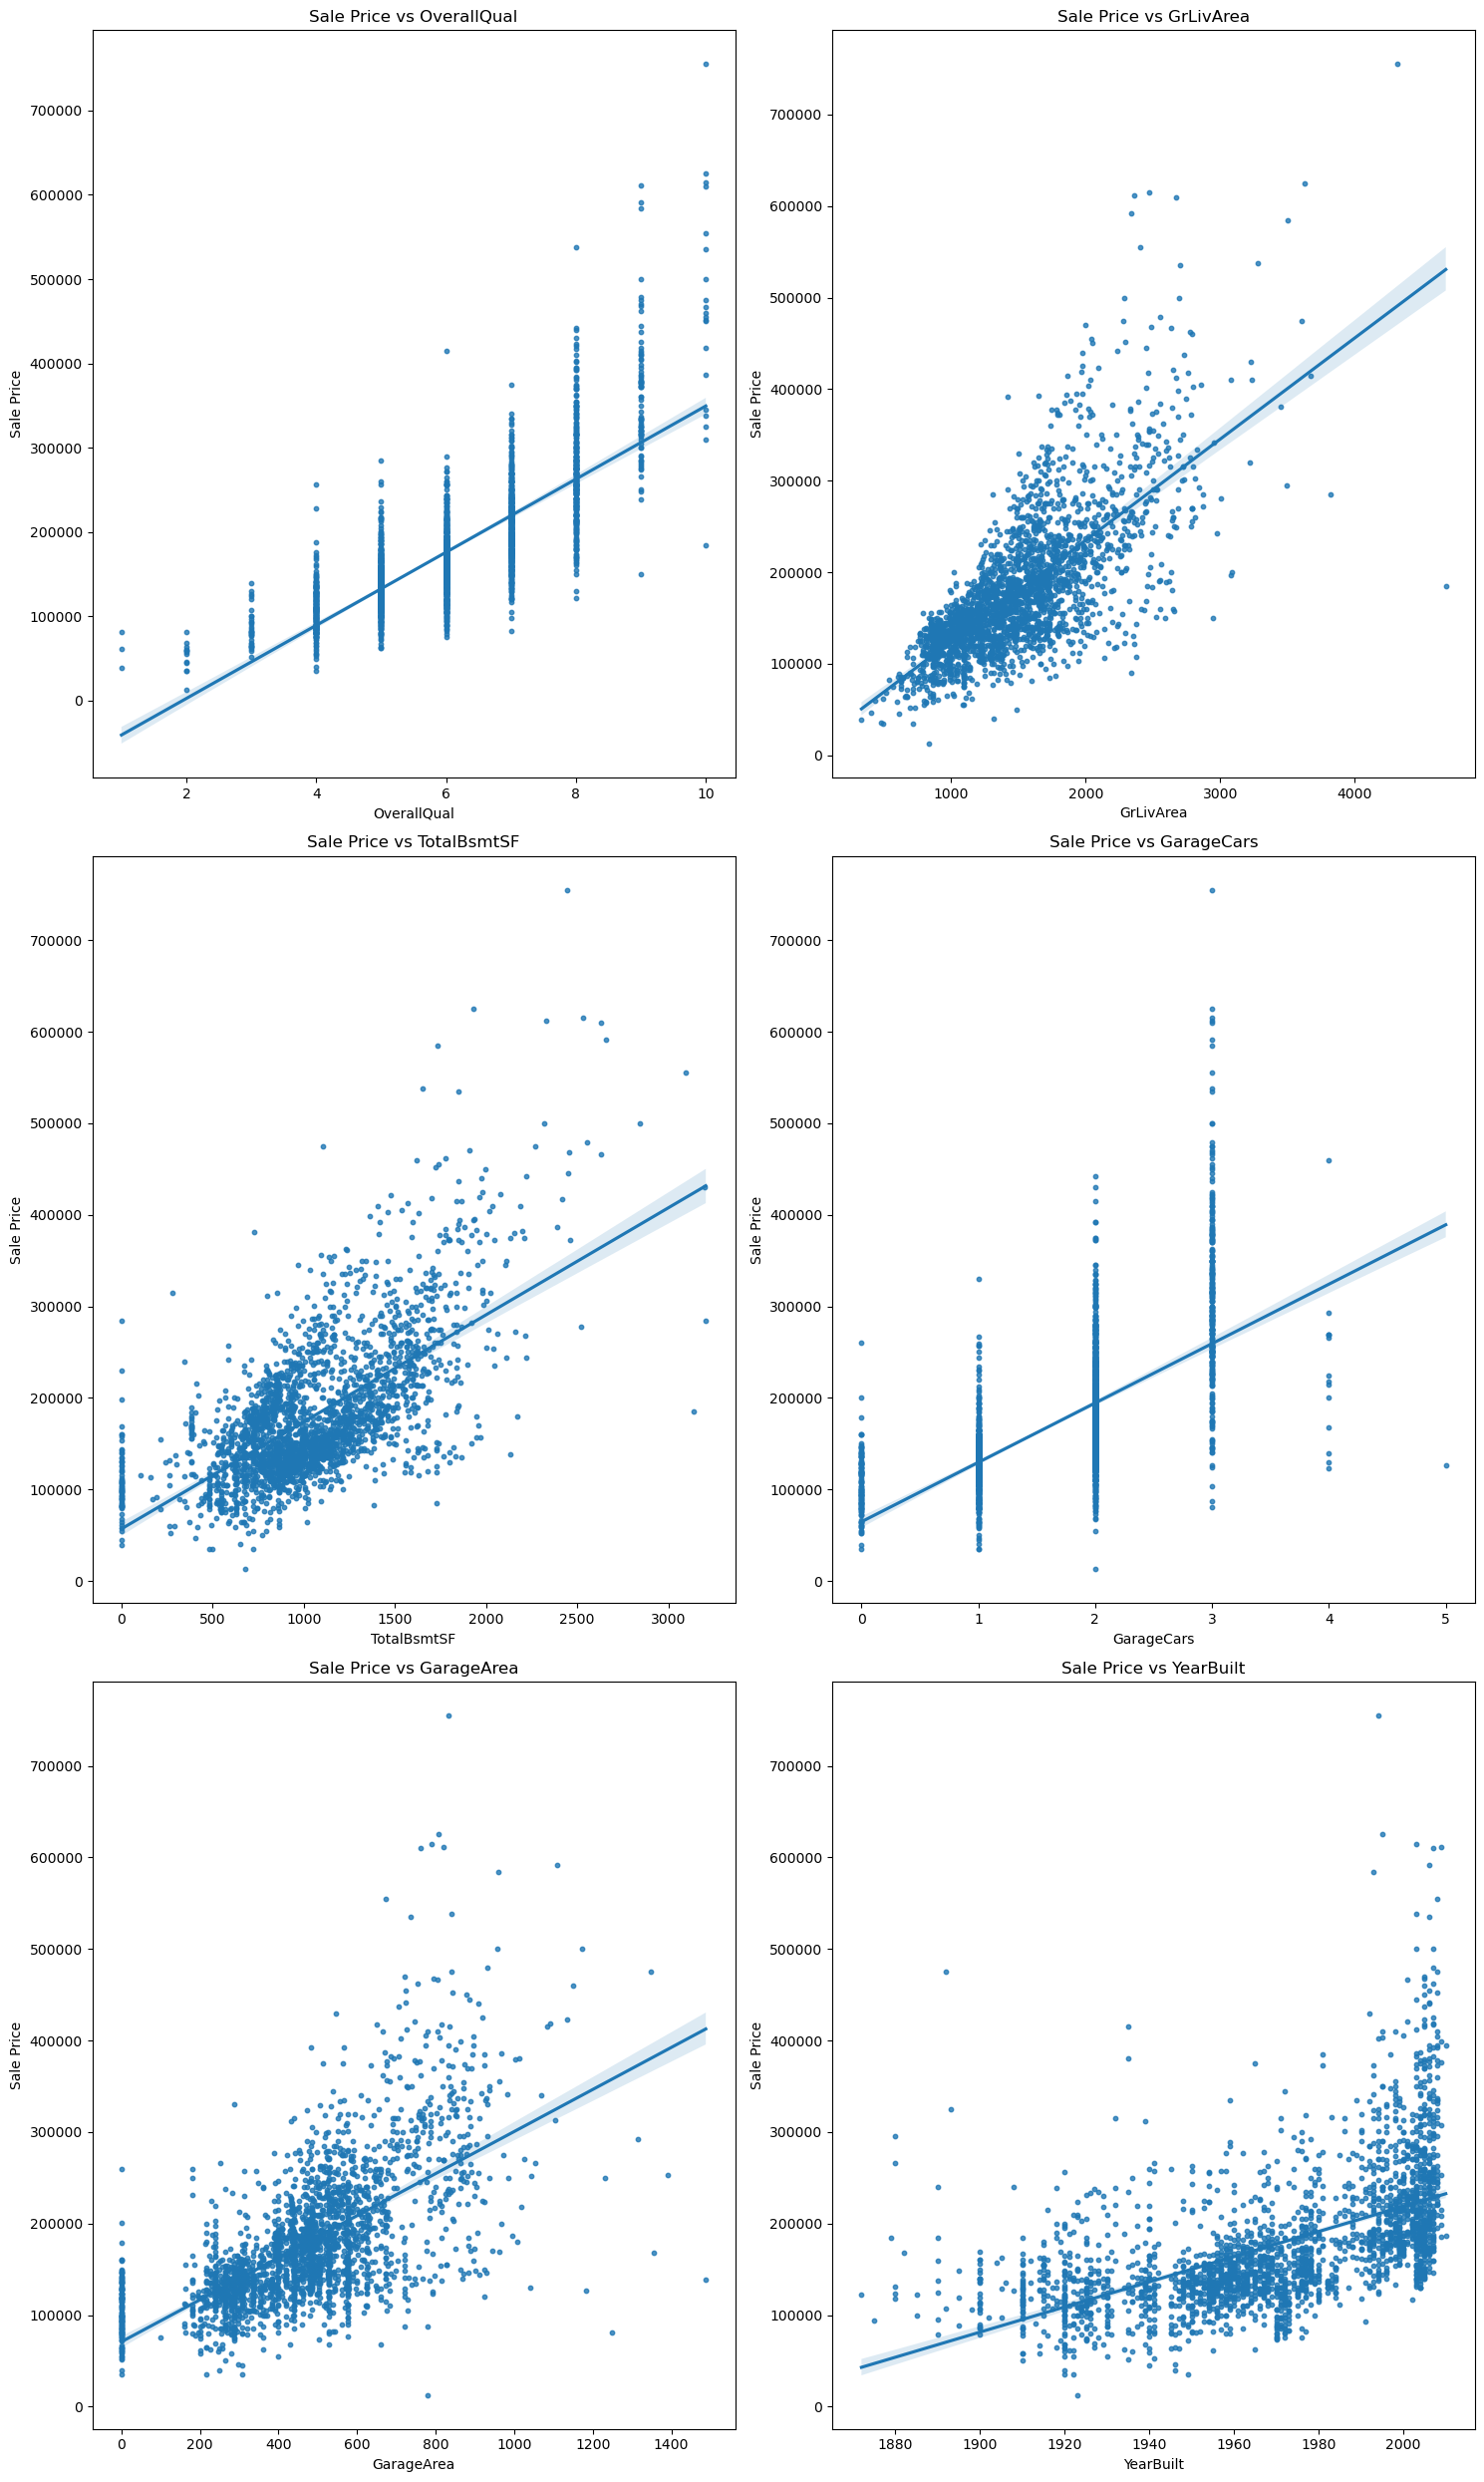

In [16]:
predictors = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt']
# Loop to create scatter plots with regression lines for each predictor against SalePrice
plt.figure(figsize=(15, 25))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(3, 2, i)
    sns.regplot(x=data1[predictor], y=data1['SalePrice'], scatter_kws={'s':10})
    plt.title(f'Sale Price vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [8]:
# Import necessary libraries for train-test split and model training
from sklearn.model_selection import train_test_split
X = data1[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt']].dropna()
y = data1['SalePrice'][X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the coefficients of the model
coefficients_df = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': model.coef_
})

# Display the performance metrics and coefficients
mse, r2, coefficients_df

(1081890325.3093839,
 0.825086547750253,
      Predictor   Coefficient
 0  OverallQual  18734.495907
 1    GrLivArea     54.411077
 2  TotalBsmtSF     37.655418
 3   GarageCars   -884.620495
 4   GarageArea     46.760684
 5    YearBuilt    302.736102)